In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

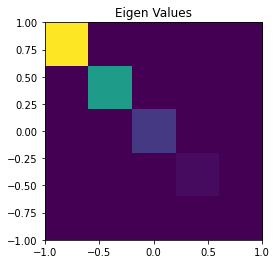

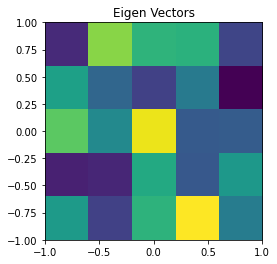

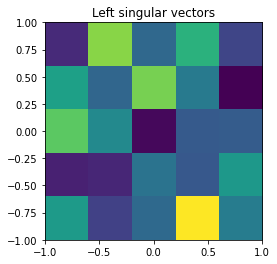

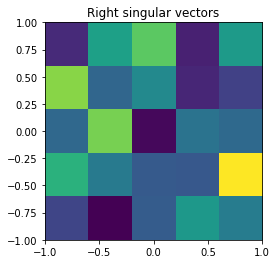

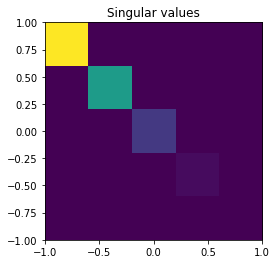

[[-0.61450503  0.53318385 -0.25616282  0.23365759 -0.4667797 ]
 [ 0.11969529 -0.26902186  0.49181702 -0.1436949  -0.80670197]
 [ 0.41057649 -0.03923564 -0.77261801 -0.34728756 -0.33517201]
 [-0.65761251 -0.63411513 -0.1850592  -0.35641195  0.06455548]
 [ 0.08384116 -0.48959247 -0.24761085  0.82287167 -0.12182345]]
[[-0.61450503  0.11969529  0.41057649 -0.65761251  0.08384116]
 [ 0.53318385 -0.26902186 -0.03923564 -0.63411513 -0.48959247]
 [-0.25616282  0.49181702 -0.77261801 -0.1850592  -0.24761085]
 [ 0.23365759 -0.1436949  -0.34728756 -0.35641195  0.82287167]
 [-0.4667797  -0.80670197 -0.33517201  0.06455548 -0.12182345]]
[[-0.  0. -1. -0. -0.]
 [-0. -0.  1. -0.  0.]
 [ 0. -0. -2. -0.  0.]
 [-0. -0. -0.  0.  0.]
 [ 0. -0. -0. -0. -0.]]


In [4]:
# Challenge 1:
# SVD vs eigendecomposition for square symmetric matrices.

# create a symmetric matrix (5x5)
A = np.random.randn(5, 5)
A = A @ A.T

# eig (L, W)
L, W = np.linalg.eig(A)

# eigen vectors are not sorted, lets do that
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:, sidx]

# svd (U, S, V)
U, S, V = np.linalg.svd(A)

# images of all matrices
plt.title("Eigen Values")
plt.imshow(np.diag(L), extent=[-1, 1, -1, 1])
plt.show()

plt.title("Eigen Vectors")
plt.imshow(W, extent=[-1, 1, -1, 1])
plt.show()

plt.title("Left singular vectors")
plt.imshow(U, extent=[-1, 1, -1, 1])
plt.show()

plt.title("Right singular vectors")
plt.imshow(V, extent=[-1, 1, -1, 1])
plt.show()

plt.title("Singular values")
plt.imshow(np.diag(S), extent=[-1, 1, -1, 1])
plt.show()

# compare U and V, and between U and W
print(U)
print(V)

print(np.round(U - W))

In [51]:
# Challenge 2: U from eigendecomposition of A.T @ A

# create a matrix (3x6 matrix)
A = np.random.randn(3, 6)

# full SVD (variables Us, Ss, Vs)
Us, Ss, Vs = np.linalg.svd(A)

# eig of A.T @ A (variable L, V)
L, V = np.linalg.eig(A.T @ A)

# confirm that V == Vs
sidx = np.argsort(L)[::-1]
L = L[sidx]
V = V[:, sidx]

print(np.round(V - Vs.T))

# check the relationship between Ss and L
print(np.sort(Ss)**2)
print(np.sort(L))

U_comp = np.zeros((3, 3))

# create U using only A, V, and L
for i in range(0, 3):
    U_comp[:, i] = A @ V[:, i].T / np.sqrt(L[i])

print('\n')
print(Us)
print(U_comp)

# confirm that U == Us

[[ 1.  2.  0. -0.  0.  0.]
 [ 0. -0. -0.  0. -0. -0.]
 [-1.  0. -0. -0.  0. -0.]
 [ 1. -0.  0. -1.  1.  0.]
 [ 0.  0.  0.  1. -2. -0.]
 [ 1. -1.  0.  0. -0. -0.]]
[2.3459448  6.05588734 9.59753949]
[-4.70925339e-16  1.02756416e-16  1.37402873e-15  2.34594480e+00
  6.05588734e+00  9.59753949e+00]


[[-0.22568512 -0.8696925  -0.43897744]
 [ 0.79765336 -0.42365891  0.42925778]
 [-0.55929897 -0.25327474  0.78932665]]
[[ 0.22568512  0.8696925  -0.43897744]
 [-0.79765336  0.42365891  0.42925778]
 [ 0.55929897  0.25327474  0.78932665]]


In [15]:
# Challenge 3: AtA, Av and singular vectors
m = 4
A = np.random.randn(m, m)

AtA = A.T @ A
AAt = A @ A.T

U, S, V = np.linalg.svd(AtA)

diffs = np.zeros(m)
for i in range(0, m):
    diffs[i] = np.sum((AAt @ A @ U[:, i] - A @ U[:, i] * S[i]) ** 2)

diffs

array([1.52724896e-28, 3.59424750e-29, 1.67415296e-28, 1.08559645e-28])

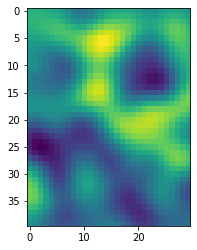

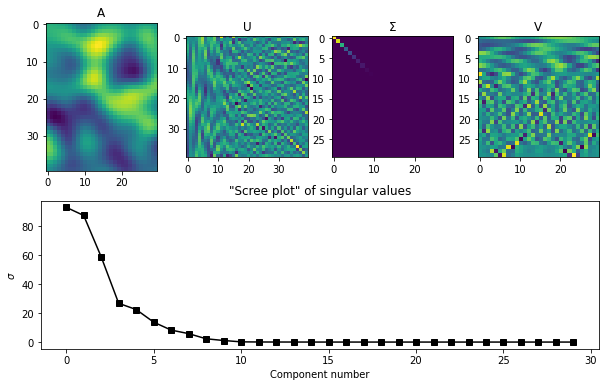

In [8]:
# Spectral theory of matrices. Similar to SVD its just how we compose the data

# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int((m + n) / 4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = signal.convolve2d(np.random.randn(m, n), g2d, "same")

plt.imshow(A)
plt.show()

# SVD
U, S, V = np.linalg.svd(A)

# show the constituent matrices
fig = plt.subplots(1, figsize=(10, 6))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title("$\Sigma$")

plt.subplot(244)
plt.imshow(V)
plt.title("V")

plt.subplot(212)
plt.plot(S, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

# lets recreate the matrix but with a lower dimensionality of data (5)
rank1mats = np.zeros((5, m, n))

for i in range(0, 5):
    # create a rank 1 matrix
    rank1mats[i, :, :] = np.outer(U[:, i] * S[i], V[i, :])

    plt.subplot2grid((2, 5), (0, i))
    plt.imshow(rank1mats[i, :, :], vmin=-5)
